In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
# Remove problematic imports

In [10]:
# Load datasets
train_data = pd.read_csv('aggregated_data_train.csv')
test_data = pd.read_csv('aggregated_data_test.csv')

# Examine the training data
print("Training data shape:", train_data.shape)
print("\nTraining data info:")
train_data.info()

# Check for missing values
print("\nMissing values in training data:")
print(train_data.isnull().sum().sum())
print("\nMissing values in test data:")
print(test_data.isnull().sum().sum())

Training data shape: (209396, 49)

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209396 entries, 0 to 209395
Data columns (total 49 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   HH_ID                                             209396 non-null  object 
 1   Sector                                            209396 non-null  int64  
 2   State                                             209396 non-null  int64  
 3   NSS-Region                                        209396 non-null  int64  
 4   District                                          209396 non-null  int64  
 5   Household Type                                    209396 non-null  int64  
 6   Religion of the head of the household             209396 non-null  int64  
 7   Social Group of the head of the household         209396 non-null  int64  
 8   HH Size (For FDQ)            

In [11]:
# Define the target variable
target = 'TotalExpense'

# Remove HH_ID from features as it's an identifier
X_train = train_data.drop(['HH_ID', target], axis=1)
y_train = train_data[target]

X_test = test_data.drop(['HH_ID', target], axis=1)
y_test = test_data[target]

# Convert any categorical variables to numerical
# For this dataset, we already verified most are numerical, but including for robustness
# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)

# Ensure X_test has the same columns as X_train
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
    
# Ensure columns order matches
X_test = X_test[X_train.columns]

In [12]:
# Split the data into training and testing sets 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Use a fixed random_state for reproducibility

In [13]:
# Feature Scaling (Important for Neural Networks)
scaler_X = StandardScaler()  # Or MinMaxScaler() - experiment
scaler_y = StandardScaler()  # Scaling the target is generally a good practice

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()  # Reshape for scaling and flatten back
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [24]:
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    # add regularization
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)), 
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)), 
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

# fit the model
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=20,
    # callbacks=[EarlyStopping(patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)],
    verbose=2
)



Epoch 1/20
5235/5235 - 14s - 3ms/step - loss: 0.6006 - val_loss: 0.4886
Epoch 2/20
5235/5235 - 12s - 2ms/step - loss: 0.5374 - val_loss: 0.4854
Epoch 3/20
5235/5235 - 13s - 2ms/step - loss: 0.5285 - val_loss: 0.4721
Epoch 4/20
5235/5235 - 12s - 2ms/step - loss: 0.5236 - val_loss: 0.4763
Epoch 5/20
5235/5235 - 13s - 2ms/step - loss: 0.5222 - val_loss: 0.4666
Epoch 6/20
5235/5235 - 12s - 2ms/step - loss: 0.5194 - val_loss: 0.4666
Epoch 7/20
5235/5235 - 12s - 2ms/step - loss: 0.5178 - val_loss: 0.4751
Epoch 8/20
5235/5235 - 21s - 4ms/step - loss: 0.5177 - val_loss: 0.4653
Epoch 9/20
5235/5235 - 13s - 2ms/step - loss: 0.5165 - val_loss: 0.4705
Epoch 10/20
5235/5235 - 11s - 2ms/step - loss: 0.5149 - val_loss: 0.4647
Epoch 11/20
5235/5235 - 12s - 2ms/step - loss: 0.5159 - val_loss: 0.4713
Epoch 12/20
5235/5235 - 12s - 2ms/step - loss: 0.5137 - val_loss: 0.4728
Epoch 13/20
5235/5235 - 12s - 2ms/step - loss: 0.5151 - val_loss: 0.4664
Epoch 14/20
5235/5235 - 20s - 4ms/step - loss: 0.5147 - val_

In [25]:
# fit the model
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=20,
    # callbacks=[EarlyStopping(patience=10, restore_best_weights=True), ReduceLROnPlateau(patience=5)],
    verbose=2
)

Epoch 1/20
5235/5235 - 12s - 2ms/step - loss: 0.5122 - val_loss: 0.4645
Epoch 2/20
5235/5235 - 11s - 2ms/step - loss: 0.5133 - val_loss: 0.4669
Epoch 3/20
5235/5235 - 12s - 2ms/step - loss: 0.5140 - val_loss: 0.4641
Epoch 4/20
5235/5235 - 12s - 2ms/step - loss: 0.5133 - val_loss: 0.4622
Epoch 5/20
5235/5235 - 12s - 2ms/step - loss: 0.5133 - val_loss: 0.4706
Epoch 6/20
5235/5235 - 11s - 2ms/step - loss: 0.5131 - val_loss: 0.4627
Epoch 7/20
5235/5235 - 11s - 2ms/step - loss: 0.5128 - val_loss: 0.4678
Epoch 8/20
5235/5235 - 12s - 2ms/step - loss: 0.5120 - val_loss: 0.4877
Epoch 9/20
5235/5235 - 12s - 2ms/step - loss: 0.5148 - val_loss: 0.4604
Epoch 10/20
5235/5235 - 12s - 2ms/step - loss: 0.5132 - val_loss: 0.4631
Epoch 11/20
5235/5235 - 12s - 2ms/step - loss: 0.5130 - val_loss: 0.4684
Epoch 12/20


KeyboardInterrupt: 

In [26]:
# Evaluate the model
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')
print(f'MAPE: {mape}')

1636/1636 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
MSE: 91946810.51653318
R^2: 0.5060598529269276
MAPE: 0.317623541463095


In [ ]:
# --- Neural Network Model ---
def build_model(learning_rate=0.001, activation='relu', num_layers=2, num_neurons=64, dropout_rate=0.0):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))  # Input layer, shape is (number of features,)

    # Add hidden layers
    for _ in range(num_layers):
        model.add(layers.Dense(num_neurons, activation=activation))
        if dropout_rate > 0.0:
            model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1))  # Output layer (single neuron for regression)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')  # MSE for regression
    return model

In [ ]:
# --- Manual Hyperparameter Tuning (avoiding KerasRegressor issues) ---

# Define hyperparameter options
learning_rates = [0.001, 0.01, 0.1]
activations = ['relu', 'tanh', 'elu']
num_layers_options = [2, 3, 4]
num_neurons_options = [32, 64, 128]
dropout_rates = [0.0, 0.2, 0.4]

# Split training data for validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_scaled, y_train_scaled, test_size=0.2, random_state=42)

# Track best model and performance
best_val_loss = float('inf')
best_params = {
    'learning_rate': 0.001,
    'activation': 'relu',
    'num_layers': 2,
    'num_neurons': 64,
    'dropout_rate': 0.0
}

# Simple early stopping for each model trial
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# For demonstration, we'll test a subset of combinations to save time
# In practice, you might want to test more combinations or use a more efficient search method
combinations_to_try = [
    {'learning_rate': 0.001, 'activation': 'relu', 'num_layers': 2, 'num_neurons': 64, 'dropout_rate': 0.0},
    {'learning_rate': 0.01, 'activation': 'relu', 'num_layers': 2, 'num_neurons': 64, 'dropout_rate': 0.2},
    {'learning_rate': 0.001, 'activation': 'tanh', 'num_layers': 3, 'num_neurons': 128, 'dropout_rate': 0.0},
    {'learning_rate': 0.01, 'activation': 'elu', 'num_layers': 3, 'num_neurons': 32, 'dropout_rate': 0.2},
    {'learning_rate': 0.001, 'activation': 'relu', 'num_layers': 4, 'num_neurons': 128, 'dropout_rate': 0.4}
]

print("Starting hyperparameter search...")

for i, params in enumerate(combinations_to_try):
    print(f"\nTesting combination {i+1}/{len(combinations_to_try)}: {params}")
    
    # Build model with current parameters
    model = build_model(
        learning_rate=params['learning_rate'],
        activation=params['activation'],
        num_layers=params['num_layers'],
        num_neurons=params['num_neurons'],
        dropout_rate=params['dropout_rate']
    )
    
    # Train the model
    history = model.fit(
        X_train_sub, y_train_sub,
        epochs=30,  # Reduced epochs for faster search
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Evaluate on validation set
    val_loss = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation loss: {val_loss}")
    
    # Update best model if this one is better
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_params = params
        best_model = model

print(f"\nBest parameters: {best_params}")
print(f"Best validation loss: {best_val_loss}")

Starting hyperparameter search...

Testing combination 1/5: {'learning_rate': 0.001, 'activation': 'relu', 'num_layers': 2, 'num_neurons': 64, 'dropout_rate': 0.0}
Validation loss: 0.560515820980072

Testing combination 2/5: {'learning_rate': 0.01, 'activation': 'relu', 'num_layers': 2, 'num_neurons': 64, 'dropout_rate': 0.2}
Validation loss: 0.635578989982605

Testing combination 3/5: {'learning_rate': 0.001, 'activation': 'tanh', 'num_layers': 3, 'num_neurons': 128, 'dropout_rate': 0.0}
Validation loss: 0.5660367608070374

Testing combination 4/5: {'learning_rate': 0.01, 'activation': 'elu', 'num_layers': 3, 'num_neurons': 32, 'dropout_rate': 0.2}
Validation loss: 0.6138593554496765

Testing combination 5/5: {'learning_rate': 0.001, 'activation': 'relu', 'num_layers': 4, 'num_neurons': 128, 'dropout_rate': 0.4}
Validation loss: 0.6450070142745972

Best parameters: {'learning_rate': 0.001, 'activation': 'relu', 'num_layers': 2, 'num_neurons': 64, 'dropout_rate': 0.0}
Best validation l

In [ ]:
# --- Callbacks (Early Stopping and Learning Rate Reduction) ---
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)

# --- Training the Best Model with Callbacks ---
# Recreate the best model (to ensure we're starting fresh)
final_model = build_model(
    learning_rate=best_params['learning_rate'],
    activation=best_params['activation'],
    num_layers=best_params['num_layers'],
    num_neurons=best_params['num_neurons'],
    dropout_rate=best_params['dropout_rate']
)

# Train on full training set
history = final_model.fit(X_train_scaled, y_train_scaled,
                         epochs=70, batch_size=32,
                         validation_split=0.1, # Use a validation split during training
                         callbacks=[early_stopping, reduce_lr],
                         verbose=1)  # Verbose = 1 to see training progress

# --- Evaluation ---

y_pred_scaled = final_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten() # Inverse transform to get predictions in original scale

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Epoch 1/70
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.5773 - val_loss: 0.4415 - learning_rate: 0.0010
Epoch 2/70
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.5289 - val_loss: 0.4270 - learning_rate: 0.0010
Epoch 3/70
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.5119 - val_loss: 0.4265 - learning_rate: 0.0010
Epoch 4/70
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4494 - val_loss: 0.4335 - learning_rate: 0.0010
Epoch 5/70
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.5549 - val_loss: 0.4436 - learning_rate: 0.0010
Epoch 6/70
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.5033 - val_loss: 0.4326 - learning_rate: 0.0010
Epoch 7/70
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4539 - val_loss: 0.4400 - learning_rate: 0.0010
Epoch 8/70
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.5328 - val_loss: 0.4179 - learning_rate: 0.0010
Epoch 9/70
4575/4575 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.5388 - val_loss: 0.4189 - learn

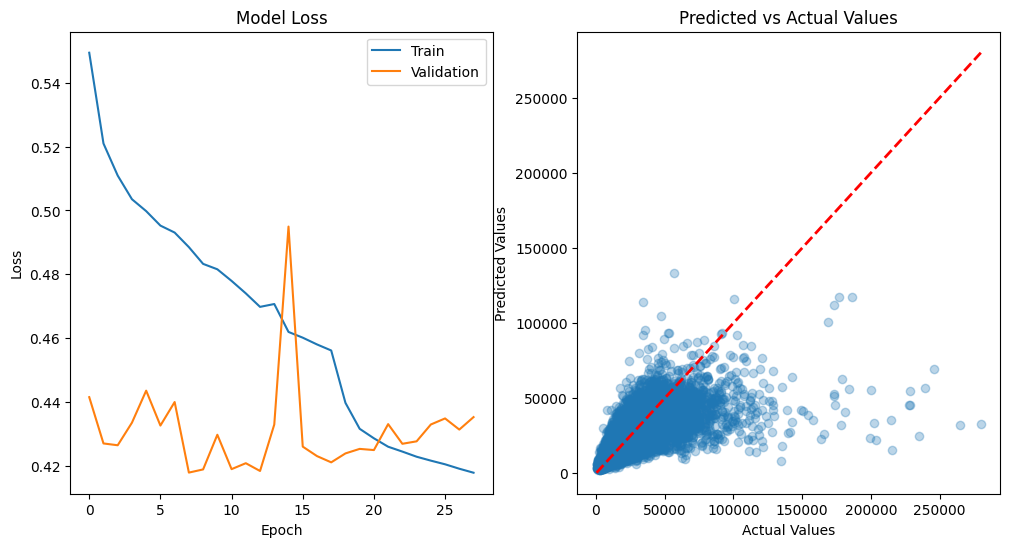

In [ ]:
# --- Plotting Training History ---

plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot predicted vs actual values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.3)  # Scatter plot of actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect prediction
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# --- Save the Model ---
final_model.save('trained_mpce_model.h5')

# --- Load the Saved Model (Example) ---
# loaded_model = keras.models.load_model('trained_mpce_model.h5')
# # Now you can use loaded_model to make predictions on new data.